In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
DATA_LOG_FILE = "sensorTracks_Sat_15_11_2025"
#DATA_LOG_FILE = "sensorTracksV2"
DATA_LOG_PATH = "https://project-gxxr-default-rtdb.firebaseio.com/{0}/front_tyre.json".format(DATA_LOG_FILE)

front_tyre_raw = requests.get(DATA_LOG_PATH)
front_tyre_json = front_tyre_raw.json()
front_tyre_df = pd.DataFrame.from_dict(front_tyre_json, orient="index")

In [ ]:
front_tyre_df.drop(columns=["node"], inplace=True) # Remove the sensor node name column
front_tyre_df = front_tyre_df.dropna() # Remove any instance of sensor readings with NaN
front_tyre_df.head()

,s1,s2,s3,time
1763202932_6978323,33.79,34.09,33.17,1.763203e+09
1763202932_703843,33.79,34.09,33.17,1.763203e+09
1763202932_7286375,33.79,34.09,33.17,1.763203e+09
1763202932_7416086,33.91,34.09,33.27,1.763203e+09
1763202932_7454019,33.91,34.09,33.27,1.763203e+09


In [ ]:
front_tyre_df["time"] = pd.to_datetime(front_tyre_df["time"], unit="s", utc=True)
front_tyre_df = front_tyre_df.set_index("time").sort_index()
front_tyre_df.head()

,s1,s2,s3
time,,,
2025-11-15 10:35:32.697832346+00:00,33.79,34.09,33.17
2025-11-15 10:35:32.703843117+00:00,33.79,34.09,33.17
2025-11-15 10:35:32.728637457+00:00,33.79,34.09,33.17
2025-11-15 10:35:32.741608620+00:00,33.91,34.09,33.27
2025-11-15 10:35:32.745401859+00:00,33.91,34.09,33.27


In [ ]:
df_plot = front_tyre_df.resample("200ms").mean()

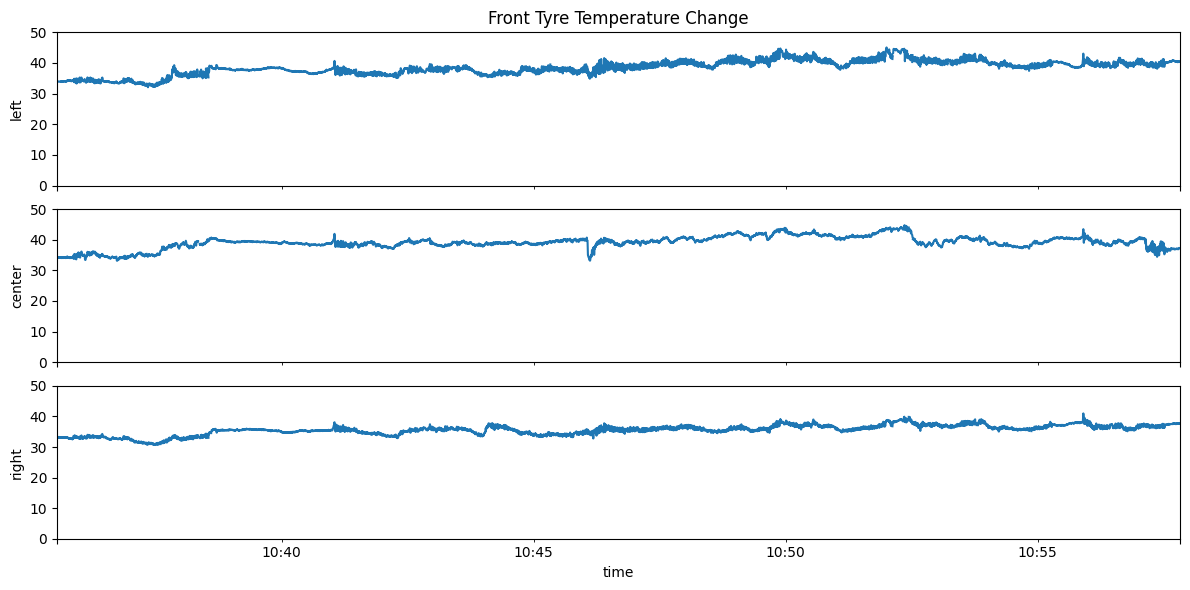

In [ ]:
# Plot for Front Tyre Data (ax,zy,az)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,1, figsize=(12,6), sharex=True)
axs[0].set_title("Front Tyre Temperature Change")

# Left tyre section
df_plot["s1"].plot(ax=axs[0])
axs[0].set_ylabel("left")
axs[0].set_ylim(0, 50)

# Center tyre section
df_plot["s2"].plot(ax=axs[1])
axs[1].set_ylabel("center")
axs[1].set_ylim(0, 50)

#Right Tyre Section
df_plot["s3"].plot(ax=axs[2])
axs[2].set_ylabel("right")
axs[2].set_ylim(0, 50)

axs[2].set_xlabel("time")

plt.tight_layout()
plt.show()